# Global Path Variables

In [ ]:
base_path = "drive/MyDrive/Medical Data/"
EDA = "drive/MyDrive/Medical Data/EDA/"

# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from tqdm import tqdm

# Convert npz file to hdf5 file

Why ?

The conversion from NPZ to HDF5 could have various motivations:

1. Data Integrity and Compression: HDF5 provides mechanisms to ensure data integrity and can also store data in a compressed form, reducing storage requirements.

2. Support for Larger Datasets: HDF5 is built to store large datasets that may not fit entirely into memory. This means that with the appropriate software, you can work with huge datasets without the need to load everything into memory.

3. Complex Hierarchies and Metadata: HDF5 supports more complex data hierarchies and has better metadata support. You can organize data into nested groups, similar to folders in a filesystem.

4. Compatibility: Some software or libraries may work better with (or only support) HDF5 format, so converting to it may be beneficial from an interoperability perspective.

5. Efficient Access: HDF5 allows you to read subsets of datasets without reading the entire dataset into memory. This is crucial when dealing with large datasets.

In [ ]:
def convert_npz_to_hdf5(npz_path, hdf5_path):
    """
    Convert an NPZ file to HDF5 format.

    The function reads data from an NPZ file and writes it to an HDF5 file,
    making the data more accessible for applications that work with large datasets.

    Parameters:
    - npz_path (str): Path to the source NPZ file.
    - hdf5_path (str): Path to the destination HDF5 file.

    Returns:
    None
    """
    # Load the NPZ file in read mode
    data = np.load(npz_path, mmap_mode='r', allow_pickle=False)

    # Create or open the HDF5 file in write mode
    with h5py.File(hdf5_path, 'w') as f:
        for key in data.keys():
            # If the data is image data, handle its large size and memory requirements appropriately
            if key == 'image':
                num_images, height, width, channels = data['image'].shape
                print(f"Converting {num_images} images...")

                # Create a dataset for images in the HDF5 file with float16 precision
                images_dset = f.create_dataset('image', (num_images, height, width, channels), dtype=np.float16)

                # Convert images in chunks to manage memory consumption
                chunk_size = 1000  # Adjust as needed
                for start_idx in tqdm(range(0, num_images, chunk_size), desc="Converting images"):
                    end_idx = start_idx + chunk_size
                    images_dset[start_idx:end_idx] = data['image'][start_idx:end_idx].astype(np.float16)
            # If the data is image names, handle strings by encoding to utf-8
            elif key == 'image_name':
                str_data = [s.item().encode('utf-8') for s in data[key].flatten()]

                # Use a special datatype in HDF5 to handle variable-length strings
                dt = h5py.special_dtype(vlen=str)
                f.create_dataset(key, (len(str_data),), dtype=dt, data=str_data)
            # For all other data, just write it directly to the HDF5 file
            else:
                f.create_dataset(key, data=data[key])

    print("Conversion complete!")


In [ ]:
convert_npz_to_hdf5(f'{base_path}Dataset5_raw_train.npz', f'{base_path}Dataset5_raw_train.h5')

In [ ]:
convert_npz_to_hdf5(f'{base_path}Dataset5_raw_test.npz', f'{base_path}Dataset5_raw_test.h5')


Converting 6540 images...


Converting images: 100%|██████████| 7/7 [02:59<00:00, 25.70s/it]

Conversion complete!


In [ ]:
convert_npz_to_hdf5(f'{base_path}Dataset5_raw_val.npz', f'{base_path}Dataset5_raw_val.h5')


Converting 6534 images...


Converting images: 100%|██████████| 7/7 [02:50<00:00, 24.30s/it]

Conversion complete!


# Load the Dataset from h5 file..


In [ ]:
# Load the data files
# def load_data(file_name):
#     data = np.load(file_name, allow_pickle = False)
#     images = data['image']
#     image_names = data['image_name']
#     image_labels = data['image_label']
#     return images, image_names, image_labels

# # Load train, test, and validation datasets
# train_images, train_names, train_labels = load_data(f'{base_path}Dataset5_raw_train.npz')
#test_images, test_names, test_labels = load_data(f'{base_path}Dataset5_raw_test.npz')
#val_images, val_names, val_labels = load_data(f'{base_path}Dataset5_raw_val.npz')


def load_hdf5_data(hdf5_path):
    f = h5py.File(hdf5_path, 'r')
    return f['image'], f['image_name'], f['image_label']

train_images, train_names, train_labels = load_hdf5_data(f'{base_path}Dataset5_raw_train.h5')
val_images, val_names, val_labels = load_hdf5_data(f'{base_path}Dataset5_raw_val.h5')
test_images, test_names, test_labels = load_hdf5_data(f'{base_path}Dataset5_raw_test.h5')

In [ ]:
print(f"train_images shape : {train_images.shape} and train_labels shape : {train_labels.shape}")
print(f"val_images shape : {val_images.shape} and train_labels shape : {val_labels.shape}")
print(f"test_images shape : {test_images.shape} and train_labels shape : {test_labels.shape}")

train_images shape : (19610, 224, 224, 3) and train_labels shape : (19610, 1)
val_images shape : (6534, 224, 224, 3) and train_labels shape : (6534, 1)
test_images shape : (6540, 224, 224, 3) and train_labels shape : (6540, 1)


In [ ]:
np.array(train_names) , np.array(train_labels)

(array([b'11547_2020_1203_Fig2_HTML-c.png', b'COVID-3569.png',
        b'COVID-2032.png', ..., b'CXR1519_IM-0335-4004.png',
        b'CXR757_IM-2308-1001.png', b'CXR1459_IM-0297-1001.png'],
       dtype=object),
 array([[0.],
        [0.],
        [0.],
        ...,
        [4.],
        [4.],
        [4.]]))

In [ ]:
train_images.shape , np.array(train_images).dtype , np.array(train_labels).shape, train_names.shape , np.array(train_labels.dtype), train_names.dtype

((19610, 224, 224, 3),
 dtype('<f2'),
 (19610, 1),
 (19610,),
 array(dtype('<f8'), dtype=object),
 dtype('O'))

In [ ]:
train_images

<HDF5 dataset "image": shape (19610, 224, 224, 3), type "<f2">

# Class Label to Disease Name Mapping Dict

In [ ]:
"""
COVID-19 :  4,189 : 0
Lung-Opacity : 6,012 : 1
Normal : 10,192 : 2
Viral Pneumonia : 7,397 : 3
Tuberculosis : 4,897 : 4
"""

Label_ClassName_Dict = {
    0 : "COVID-19",
    1 : "Lung-Opacity",
    2 : "Normal",
    3 : "Viral Pneumonia",
    4 : "Tuberculosis",
}

# Perform EDA on the datasets

1. Distribution of classes in training, testing, and validation sets.
2. Average pixel intensity distribution.
3. Size distribution of the images.
4. Display some samples of each class.
<!-- 5. Check if any images are duplicated across the datasets. -->
5. Check for missing values (if any).
6. Distribution of image intensities for each class.
<!-- 8. Distribution of image widths and heights. -->
<!-- 7. Correlation between different classes. ( No correlation as the classes are categorical ) -->



In [ ]:
# 1. Distribution of classes in training, testing, and validation sets
def plot_class_distribution(labels, Type = "Training" , Path = f"{EDA}/Train_Value_Counts.png"):
    labels_series = pd.Series(np.array(labels).squeeze())
    # print(labels_series)

    classes = labels_series.unique()
    values = []
    for i in classes:
      values.append(labels_series.value_counts()[i])
    print(values)

    sns.set(style="whitegrid")  # Set the style of the plot (optional)
    plt.figure(figsize=(10, 6))  # Set the size of the plot (optional)

    class_names = [Label_ClassName_Dict[class_id] for class_id in classes]  # Get class names from the dictionary

    ax = sns.barplot(x=class_names, y=values)
    plt.ylabel("Number of Samples")
    plt.xlabel("Class Label")
    plt.title(f'Number of Samples Belonging to Each Infectious Disease Class in Chest Radiological Images {Type} Dataset.')
    # Add the actual number of samples above each bar
    for i, v in enumerate(values):
        ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Prevent labels from being cut off
    plt.savefig(Path)
    plt.show()

# 2. Average pixel intensity distribution
def plot_pixel_intensity(images, Path=f"{EDA}/Train_pixel_intensity.png" , Type = "Training"):
    plt.hist(np.array(images).mean(axis=(1, 2, 3)), bins=30, label=f'{Type}')
    # plt.hist(test_images.mean(axis=(1, 2, 3)), bins=30, label='Test')
    # plt.hist(val_images.mean(axis=(1, 2, 3)), bins=30, label='Validation')
    plt.legend()
    plt.title(f'Pixel Intensity Distribution of {Type} Dataset.')
    plt.savefig(Path)
    plt.show()

# 3. Size distribution of the images
def plot_image_size(images, Path=f"{EDA}/Train_img_size_dist.png", Type="Training"):
    images = np.array(images)
    image_heights = [img.shape[0] for img in images]
    image_widths = [img.shape[1] for img in images]

    plt.figure(figsize=(8, 6))
    plt.hist2d(image_widths, image_heights, bins=30, cmap='Blues')
    plt.colorbar(label='Frequency')
    plt.xlabel('Image Width')
    plt.ylabel('Image Height')
    plt.title(f'Image Size Distribution of {Type} Dataset')
    plt.savefig(Path)
    plt.show()



# 4. Show some samples of each class
def display_samples(images, labels, num_samples=5, Path=f"{EDA}/Samples_Train.png", Type="Training"):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        print(labels[i])
        ax = plt.subplot(1, num_samples, i + 1)
        image = images[i]
        # Normalize the image if its values are not in the range [0, 1]
        # Convert the image to a suitable dtype
        if image.max() > 1:
            image = (image / 255.0).astype(np.float32)
        else:
            image = image.astype(np.float32)

        plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None) # Use gray colormap if the image is grayscale
        plt.title(f'Class: {labels[i]}\n' + f'Class Name : {Label_ClassName_Dict[int(labels[i].squeeze())]}\n' + f"{image.shape}")
        plt.axis('off')

    plt.suptitle(f"{Type} Samples")
    plt.tight_layout()
    plt.savefig(Path)
    plt.show()

# 5. Check if any images are duplicated across the datasets
# def check_duplicates():
#     all_images = np.vstack([test_images, val_images])
#     unique_images, counts = np.unique(all_images, axis=0, return_counts=True)
#     duplicates = unique_images[counts > 1]
#     print(f"Number of duplicated images: {len(duplicates)}")

# 6. Check for missing values (if any)
def has_missing_value(image):
    return np.isnan(image).any()

def count_images_with_missing_values(images):
    images = np.array(images)
    num_images = images.shape[0]
    vectorized_has_missing_value = np.vectorize(has_missing_value, signature='(h,w,c)->()')
    num_missing_values = vectorized_has_missing_value(images).sum()
    return num_missing_values, num_images


# 7. Distribution of image intensities for each class
def plot_intensity_per_class(images, labels, Path="intensity_per_class.png", Type = "Training"):
    classes = [0, 1, 2, 3, 4]

    # Set the style of the plot
    sns.set_style("whitegrid")

    # Use a custom color palette
    colors = sns.color_palette("cubehelix", len(classes))

    fig, axs = plt.subplots(2, 5, figsize=(20, 10))

    images = np.array(images)
    labels = np.array(labels)
    bins = np.linspace(images.min(), images.max(), 30)  # common bin edges for all classes

    # For Side-by-Side Histograms with KDE
    for idx, cls in enumerate(classes):
        ax = axs[0, idx]

        class_mask = labels.squeeze() == cls
        class_image_indices = np.where(class_mask)[0]
        class_intensities = images[class_image_indices].mean(axis=(1, 2, 3))

        # Assign color from the palette
        sns.histplot(class_intensities, bins=bins, kde=True, ax=ax, label=f'Class {cls}', color=colors[idx])

        ax.set_title(f'Class {Label_ClassName_Dict[int(cls)]}') # Assuming you have a dictionary named Label_ClassName_Dict
        ax.set_xlabel('Mean Intensity')
        if idx == 0:
            ax.set_ylabel('Frequency')

    # For Box Plots
    all_intensities = [images[labels.squeeze() == cls].mean(axis=(1, 2, 3)) for cls in classes]
    for idx, class_intensities in enumerate(all_intensities):
        ax = axs[1, idx]

        # Assign color from the palette
        sns.boxplot(y=class_intensities, ax=ax, color=colors[idx])

        ax.set_title(f'Class {Label_ClassName_Dict[int(classes[idx])]}') # Assuming you have a dictionary named Label_ClassName_Dict
        ax.set_xlabel('Mean Intensity')
        if idx == 0:
            ax.set_ylabel('Intensity Distribution')
    plt.suptitle(f"{Type}")
    plt.tight_layout()
    plt.savefig(Path)
    plt.show()

# 10. Correlation between different classes - Not applicable as the classes are categorical

## 1. Distribution of classes in training, testing, and validation sets.


[2512, 3607, 6115, 4438, 2938]


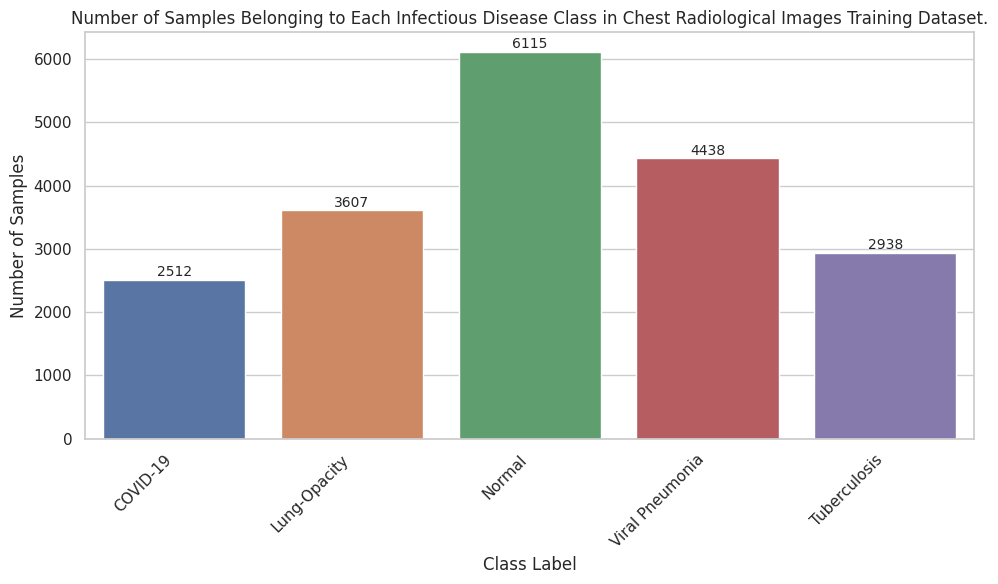

In [ ]:
plot_class_distribution(train_labels)

[836, 1202, 2038, 1479, 979]


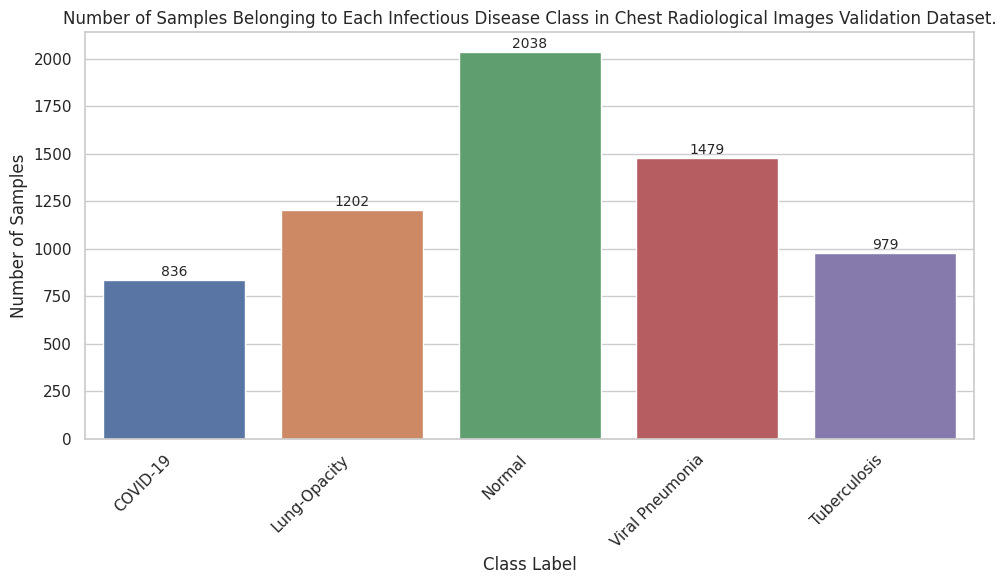

In [ ]:
plot_class_distribution(val_labels, Type = "Validation" , Path = f"{EDA}/Val_Value_Counts.png")

[838, 1203, 2039, 1480, 980]


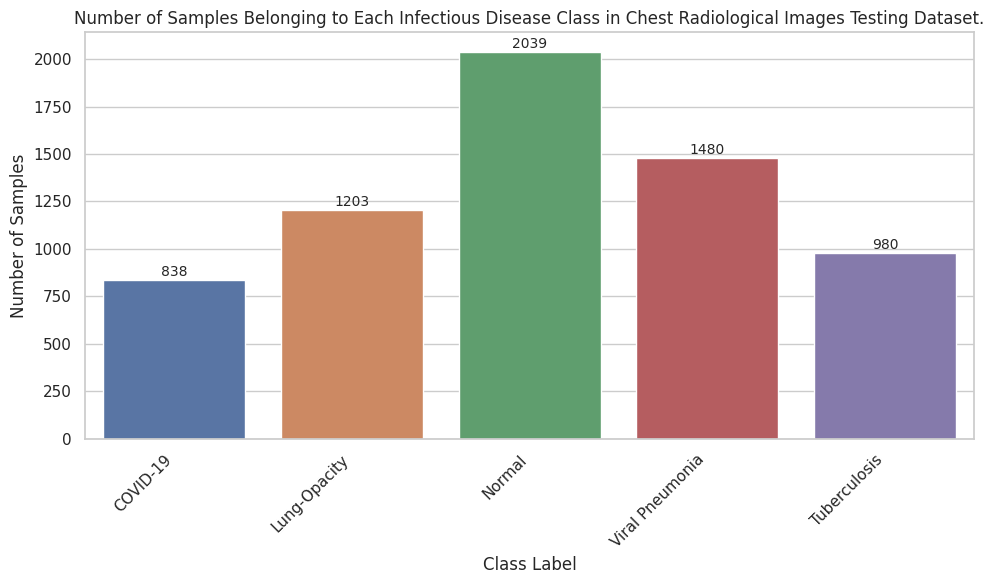

In [ ]:
plot_class_distribution(test_labels, Type = "Testing" , Path = f"{EDA}/Test_Value_Counts.png")

## 2. Average pixel intensity distribution.


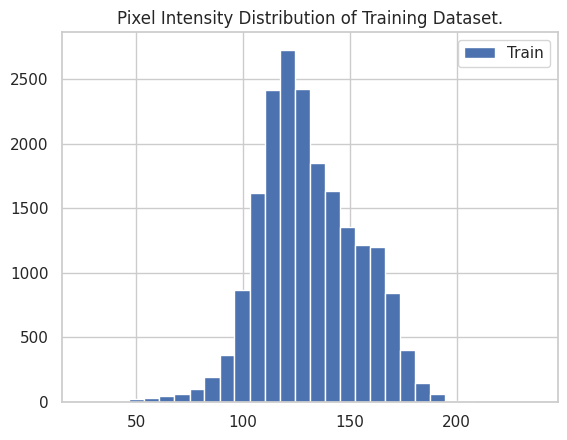

In [ ]:
plot_pixel_intensity(train_images)

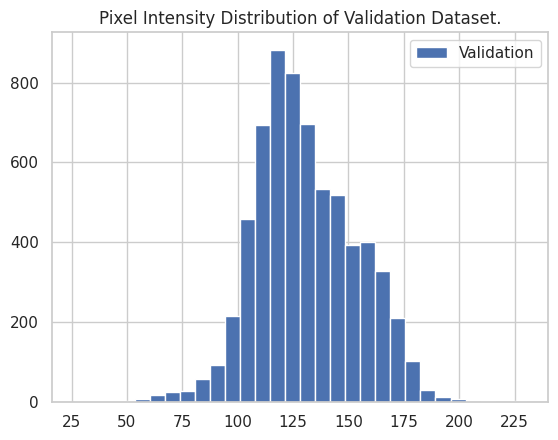

In [ ]:
plot_pixel_intensity(val_images, Path=f"{EDA}/val_pixel_intensity.png" , Type = "Validation")

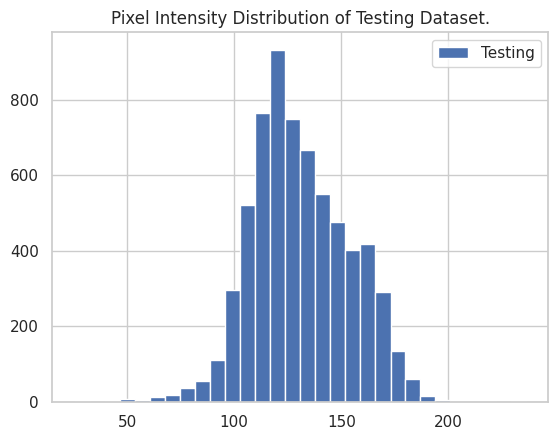

In [ ]:
plot_pixel_intensity(test_images, Path=f"{EDA}/test_pixel_intensity.png" , Type = "Testing")

## 3. Size distribution of the images.


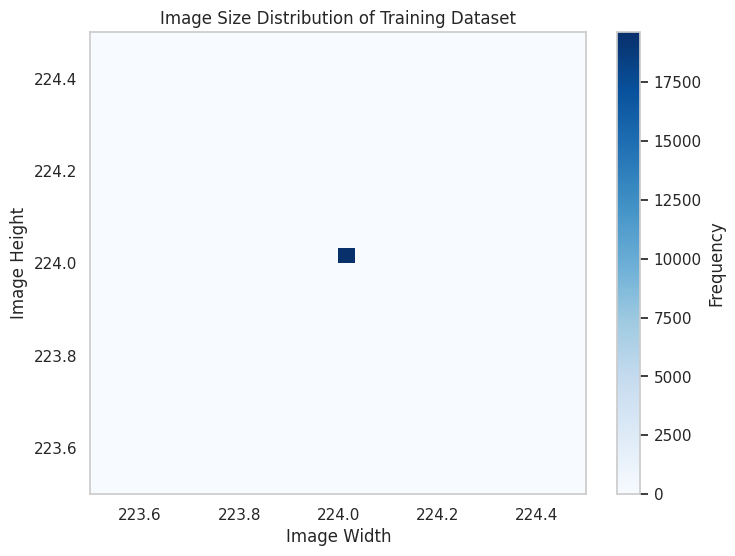

In [ ]:
# Assuming 'train_images' is the image dataset.
plot_image_size(train_images)

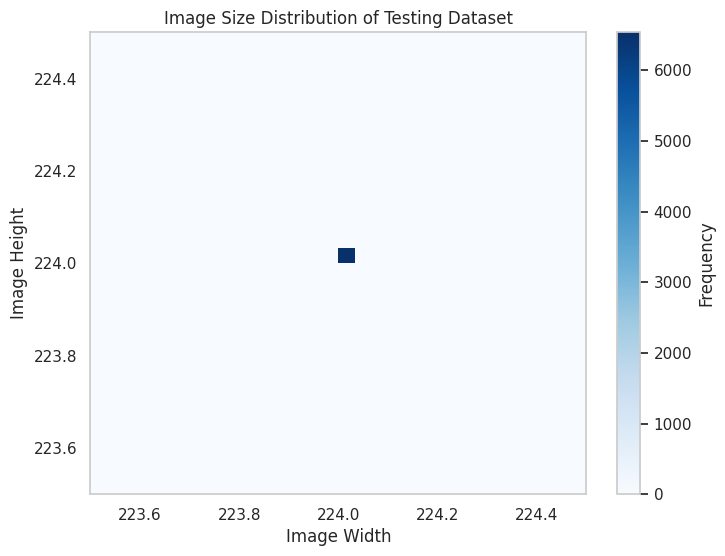

In [ ]:
plot_image_size(test_images, Path=f"{EDA}/Test_img_size_dist.png", Type="Testing")

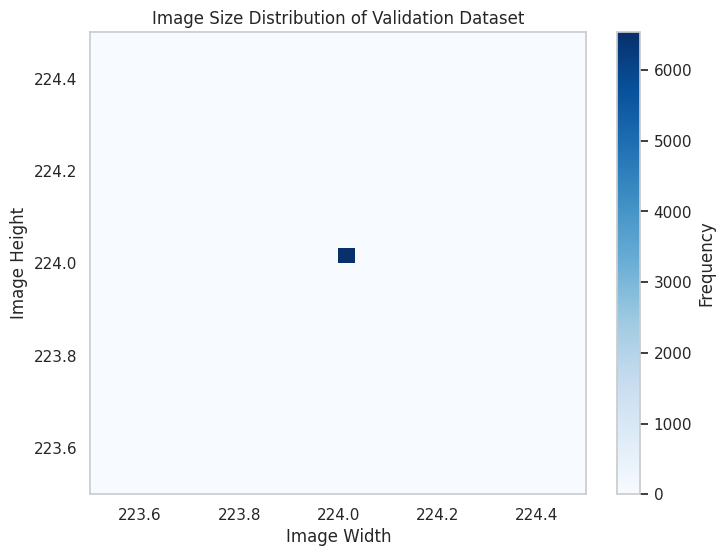

In [ ]:
plot_image_size(val_images, Path=f"{EDA}/Val_img_size_dist.png", Type="Validation")

## 4. Display some samples of each class.


[0.]
[0.]
[0.]
[0.]
[0.]


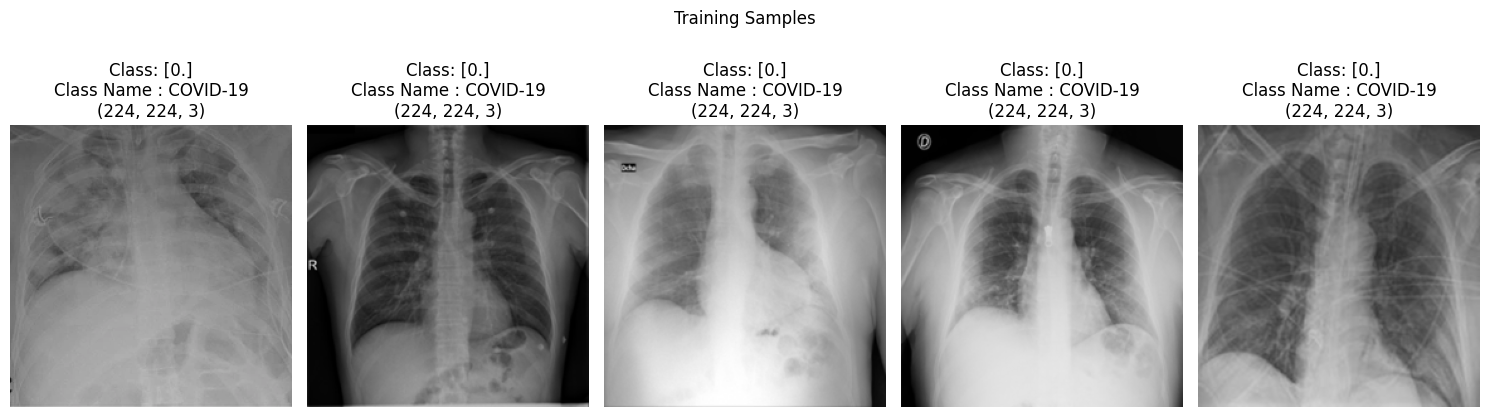

In [ ]:
# Display some train samples
display_samples(train_images, train_labels)

[0.]
[0.]
[0.]
[0.]
[0.]


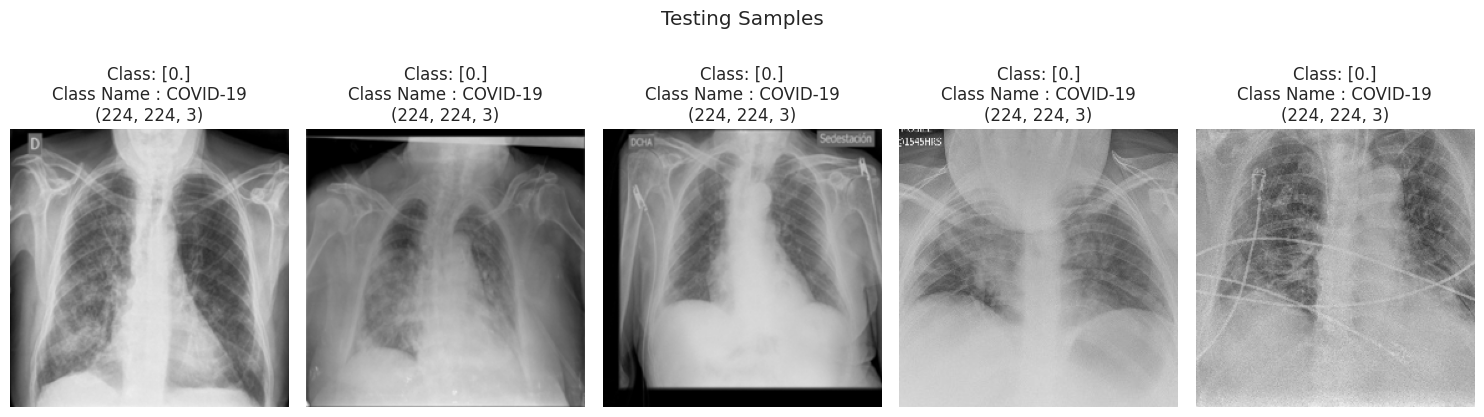

In [ ]:
display_samples(test_images, test_labels, num_samples=5, Path=f"{EDA}/Samples_Test.png", Type="Testing")

[0.]
[0.]
[0.]
[0.]
[0.]


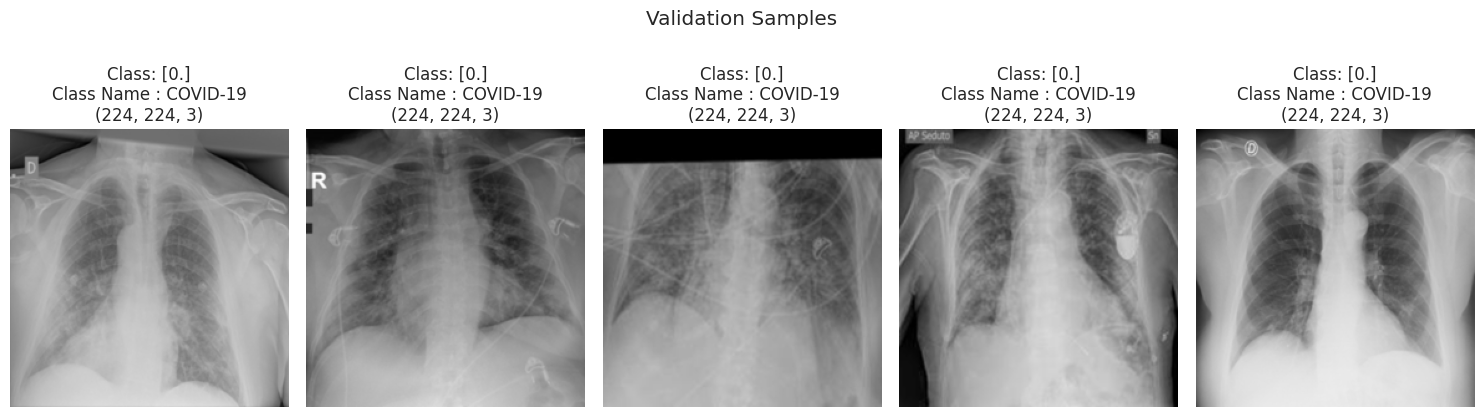

In [ ]:
display_samples(val_images, val_labels, num_samples=5, Path=f"{EDA}/Samples_Val.png", Type="Validation")

## 5. Check for missing values (if any).


In [ ]:
# Assuming 'images' is your ndarray with shape (19610, 224, 224, 3)
num_missing_values, num_images = count_images_with_missing_values(train_images)
print(f"Total missing values in images: {num_missing_values}")
print(f"Total images processed: {num_images}")

Total missing values in images: 0
Total images processed: 19610


In [ ]:
num_missing_values, num_images = count_images_with_missing_values(test_images)
print(f"Total missing values in images: {num_missing_values}")
print(f"Total images processed: {num_images}")

Total missing values in images: 0
Total images processed: 6540


In [ ]:
num_missing_values, num_images = count_images_with_missing_values(val_images)
print(f"Total missing values in images: {num_missing_values}")
print(f"Total images processed: {num_images}")

Total missing values in images: 0
Total images processed: 6534


## 6. Distribution of image intensities for each class.


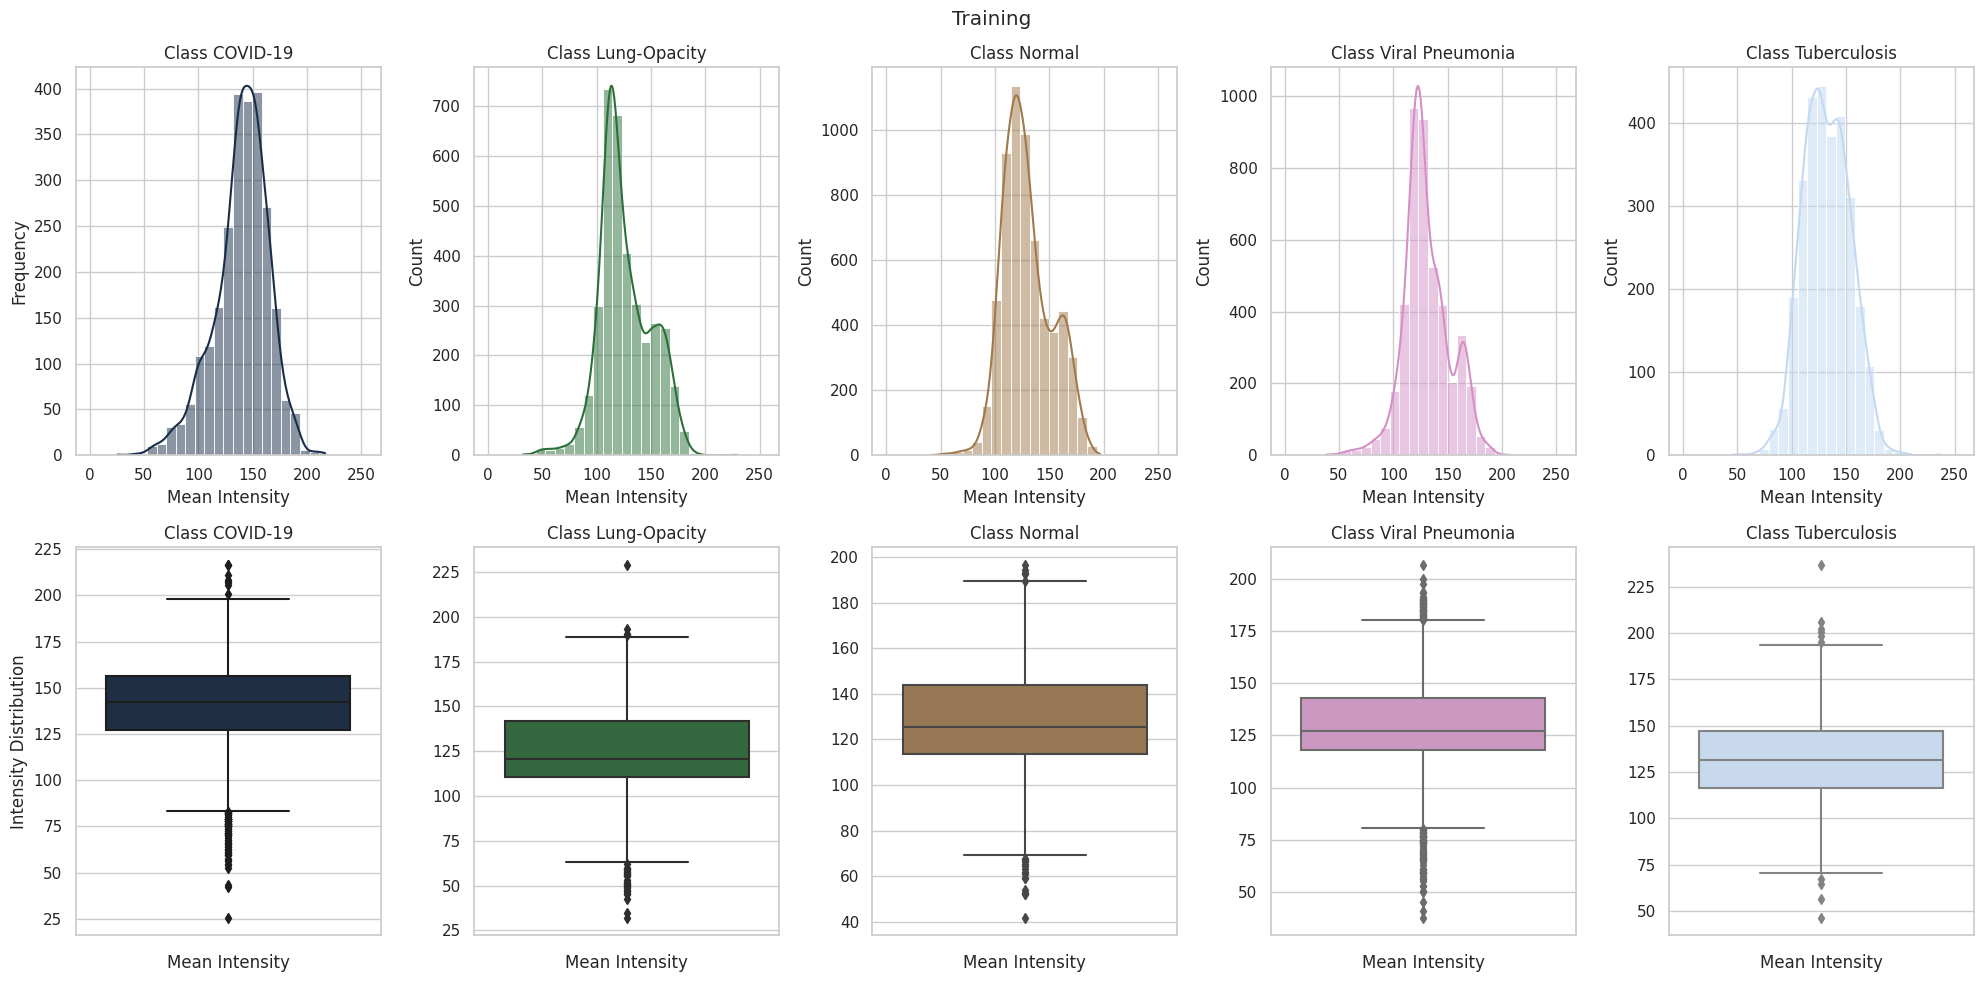

In [ ]:
plot_intensity_per_class(train_images, train_labels)

In [ ]:
plot_intensity_per_class(test_images, test_labels, Path="intensity_per_class_testing.png", Type = "Testing")

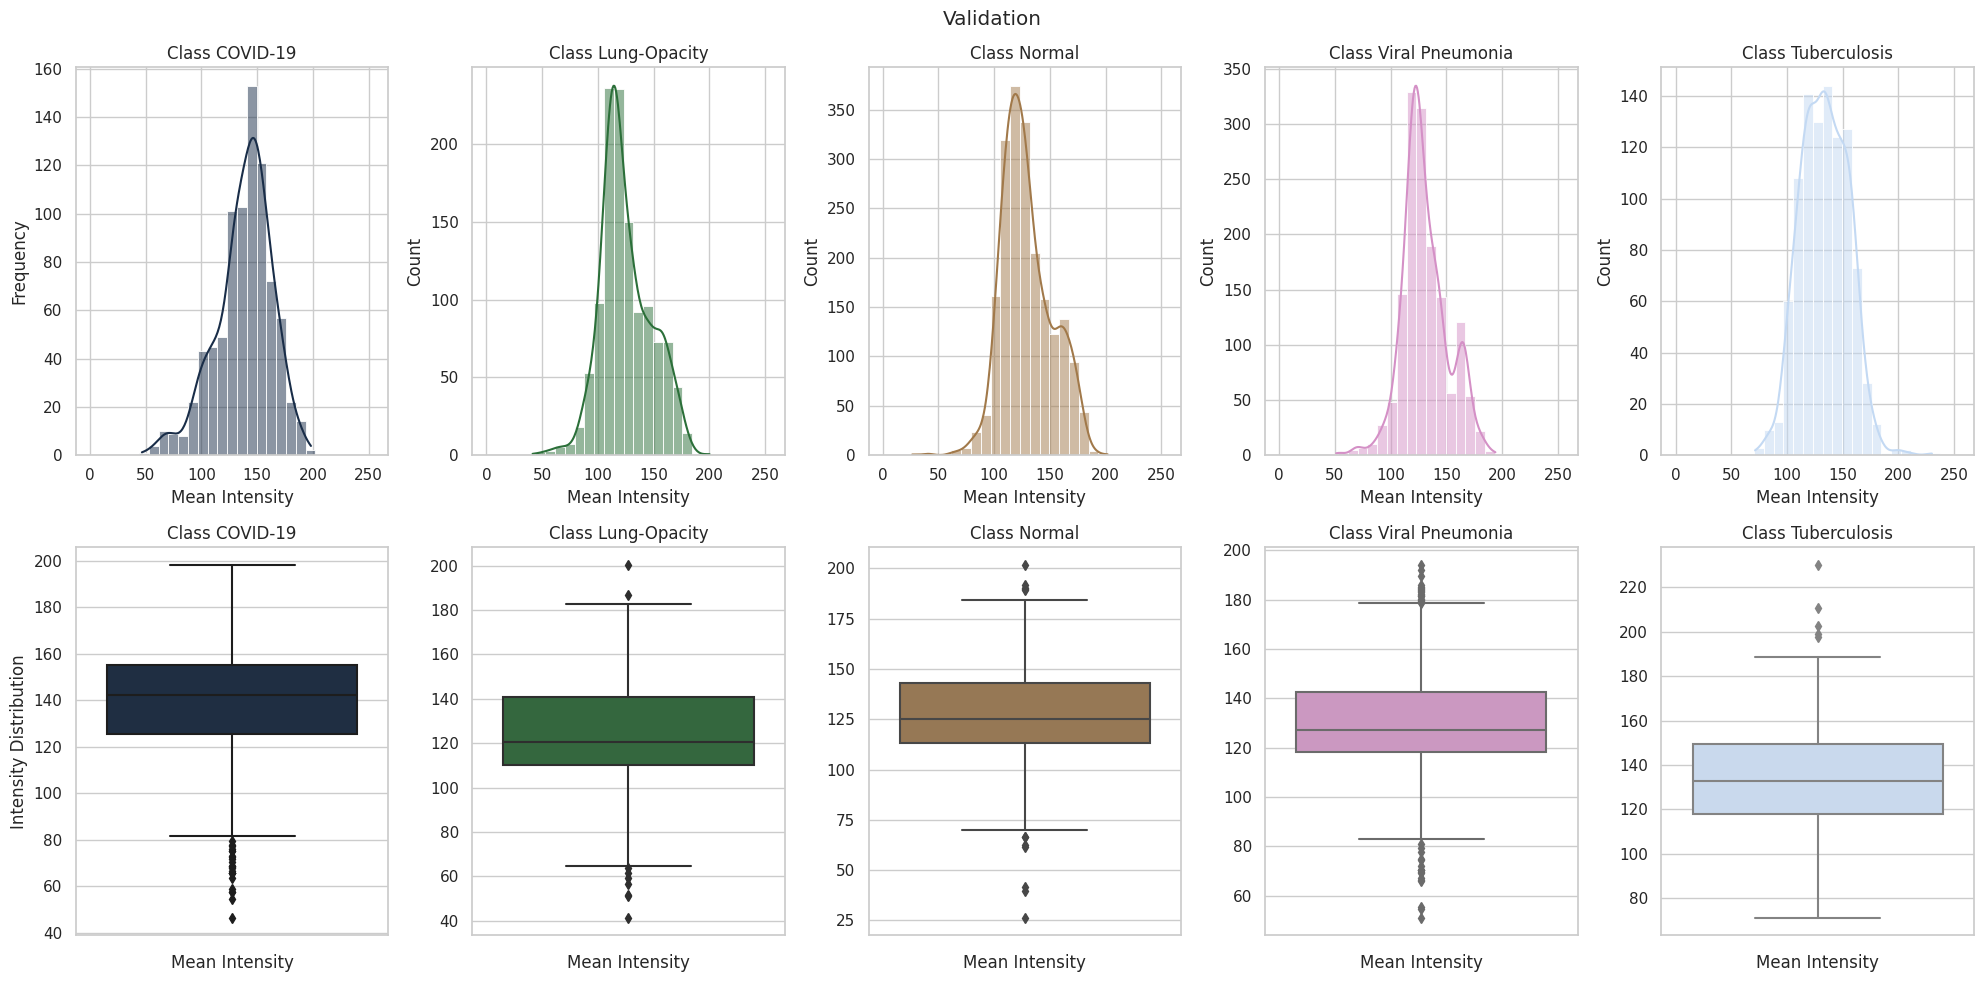

In [ ]:
plot_intensity_per_class(val_images, val_labels, Path="intensity_per_class_val.png", Type = "Validation")